# Correlation

This notebook likely analyzes correlation between oil-related products or assets—such as crude oil, gasoline, heating oil, or related ETFs. Correlation analysis helps traders, analysts, and portfolio managers understand:

* How tightly different oil products move together in price over time
* Whether certain commodities are leading indicators for others
* How diversification might reduce portfolio risk in the energy sector

🧠 Why Correlation Matters in Oil Markets
Oil-related assets are interconnected:

* Crude oil is a raw input for refined products like gasoline and diesel.
* Economic shocks, geopolitical events, or OPEC+ decisions affect multiple assets similarly—but not always equally.
* Correlation matrices and heatmaps help uncover clusters of assets with shared behavior, enabling:

1. Better hedging strategies

2. Improved portfolio diversification

3. Risk control across related positions

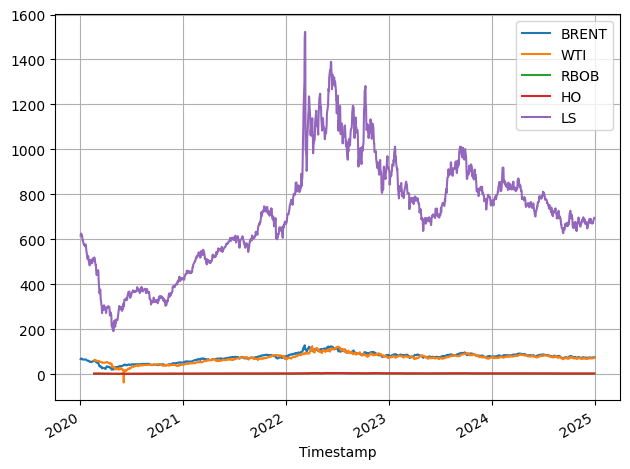

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
oil = pd.read_csv('Data/oil.csv', sep=";", decimal=",", date_format="%d/%m/%Y", index_col="Timestamp")
oil.plot(ax=ax)
ax.grid()
fig.tight_layout()

<Axes: >

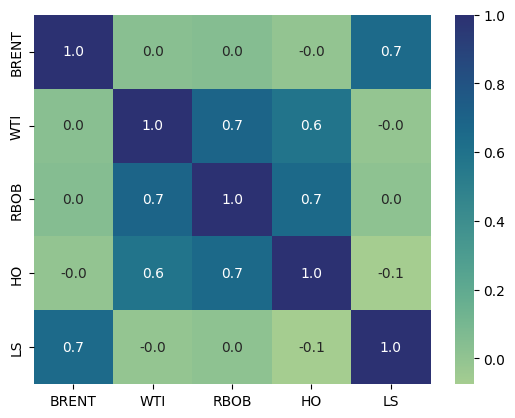

In [26]:
import seaborn as sns
import numfolio as nf
corr = nf.estimate_correlation(
    returns=oil.diff().dropna(),
    method="empyrical",
    rolling_window=5,
    n_bootstraps=100,
    n_jobs=4,
    min_length=20
)

sns.heatmap(corr, cmap="crest", annot=True, fmt=".1f")